In [1]:
from func import DataProcessor,TipFinder,VertexPos
import seaborn as sns
from plotly.offline import iplot,plot
import numpy as np
import pylab as plt
import pandas as pd
from scipy import stats
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20)


In [2]:
dp = DataProcessor('../../data/SQL/10C/85_8.db','../../data/SQL/10C/ProtoMap.db')

initialization will take some time
6.55469202995
   PadNum        PadName     PadX      PadY  BinNum
0       0  sector_center  0.00000  0.000000     257
1       1      sector1_0  1.30108  0.947523       1
2       2      sector2_0  2.18496  1.831410       2
3       3      sector1_1  2.71529  2.361740       3
4       4      sector2_1  3.59917  3.245620       4
loading finished
begin processing
1.08343291283
2.16781902313
processing finished


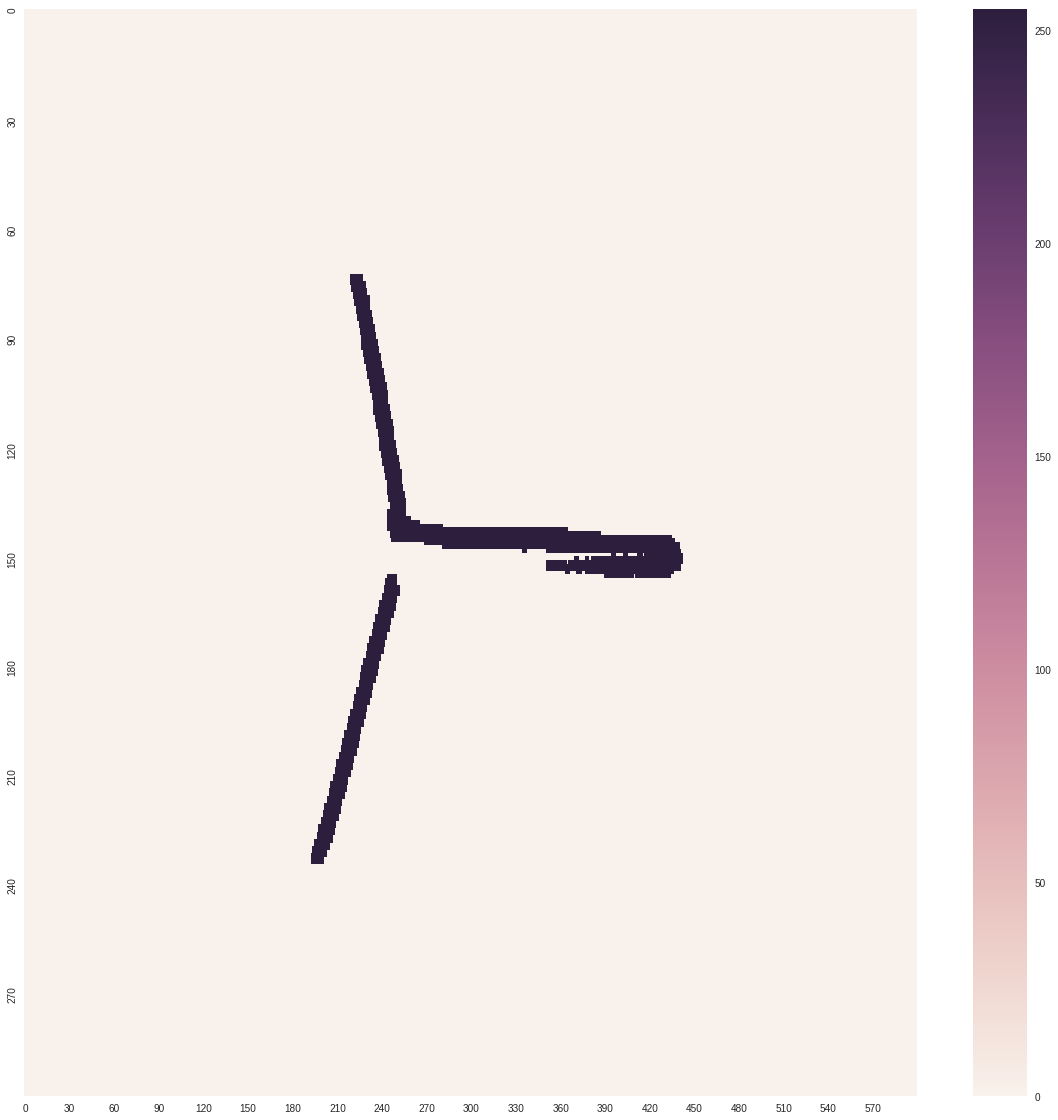

In [3]:
pic, images = dp.Process1(9)
sns.heatmap(pic[::-1], xticklabels=30, yticklabels=30)
pic_ = np.copy(pic)

score,y0,y1 = VertexPos(pic_)
points = TipFinder(pic_)
xv,yv= points[points[:,0].argsort()][-1]

442 147
0.956273626356
0.900076838964


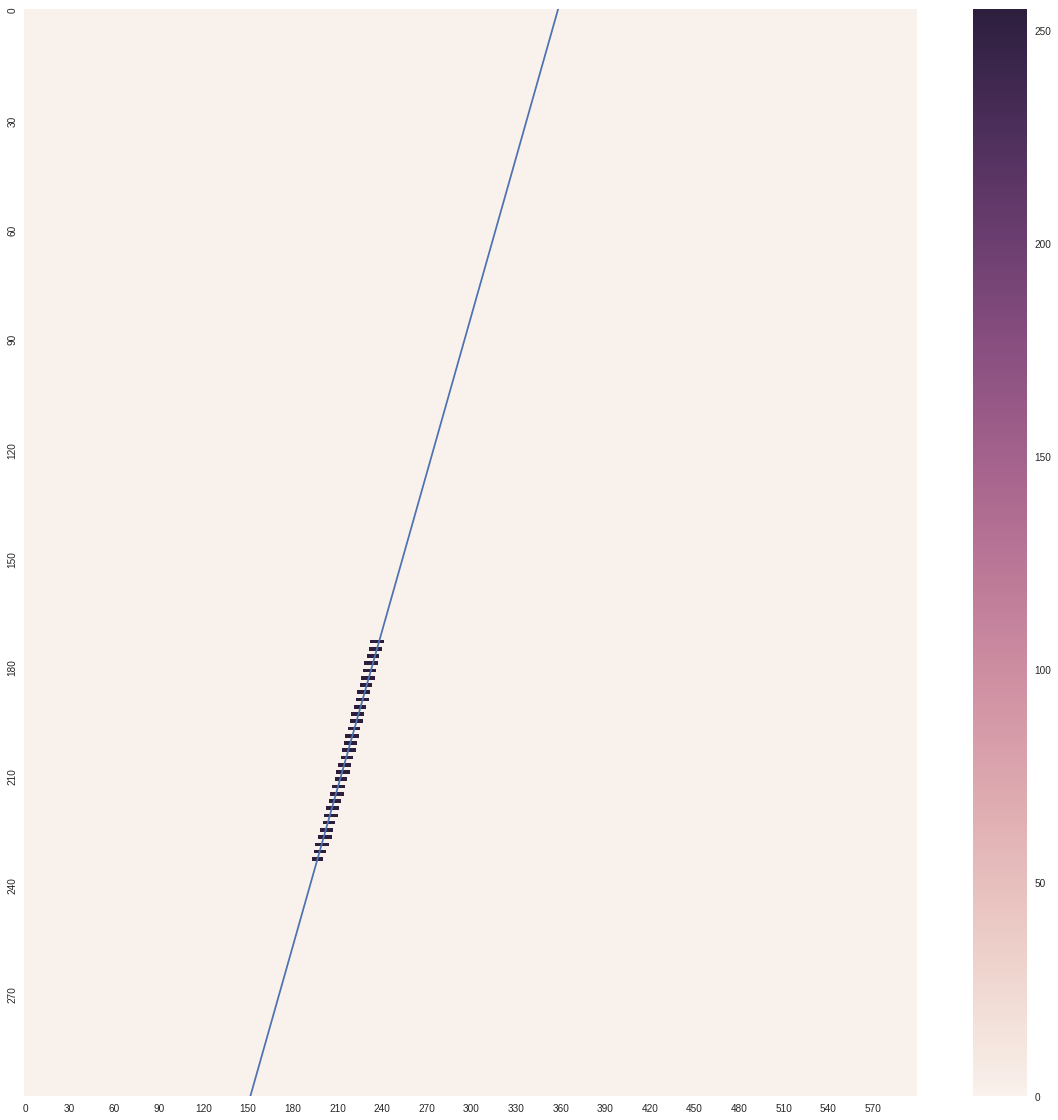

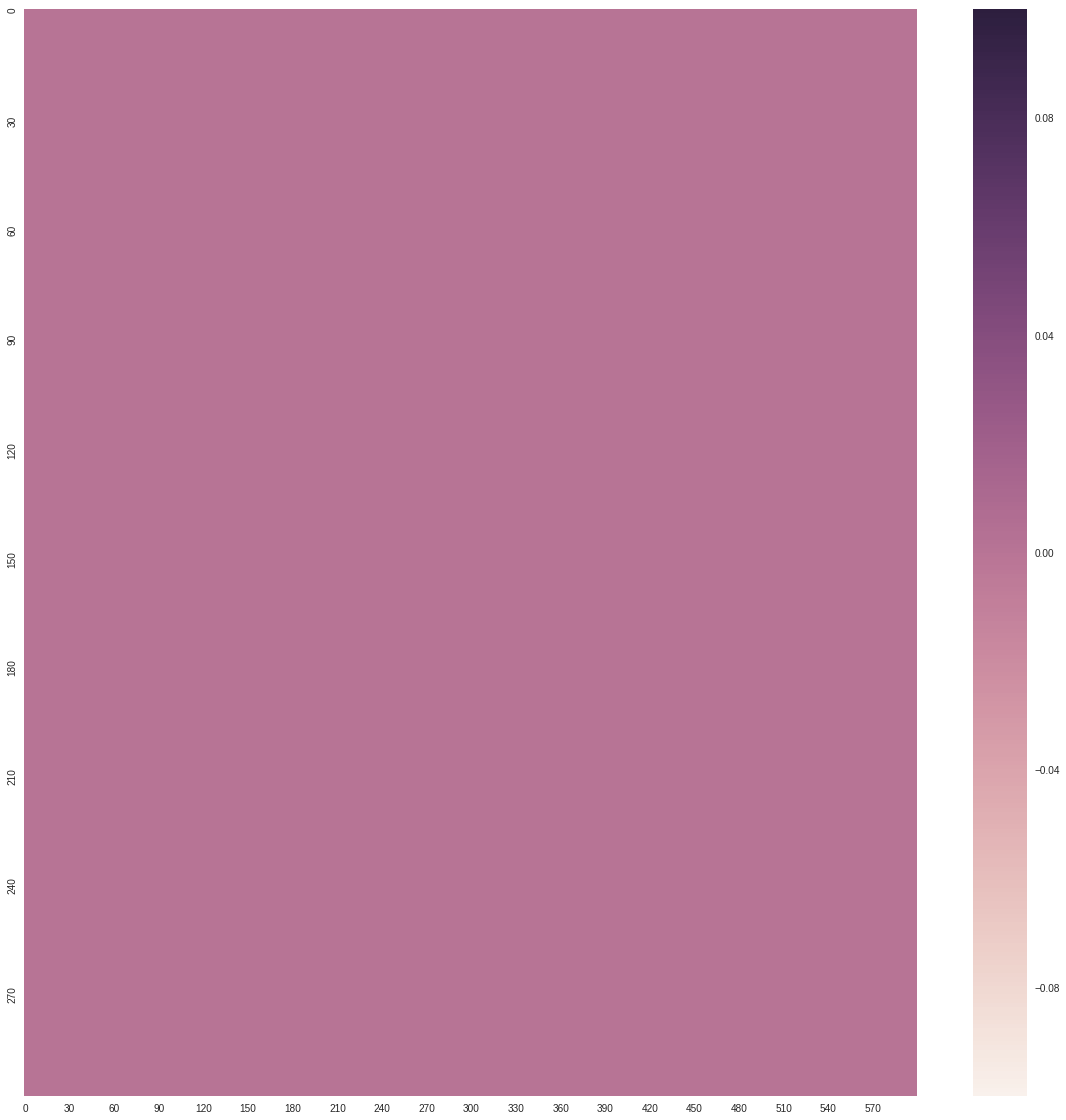

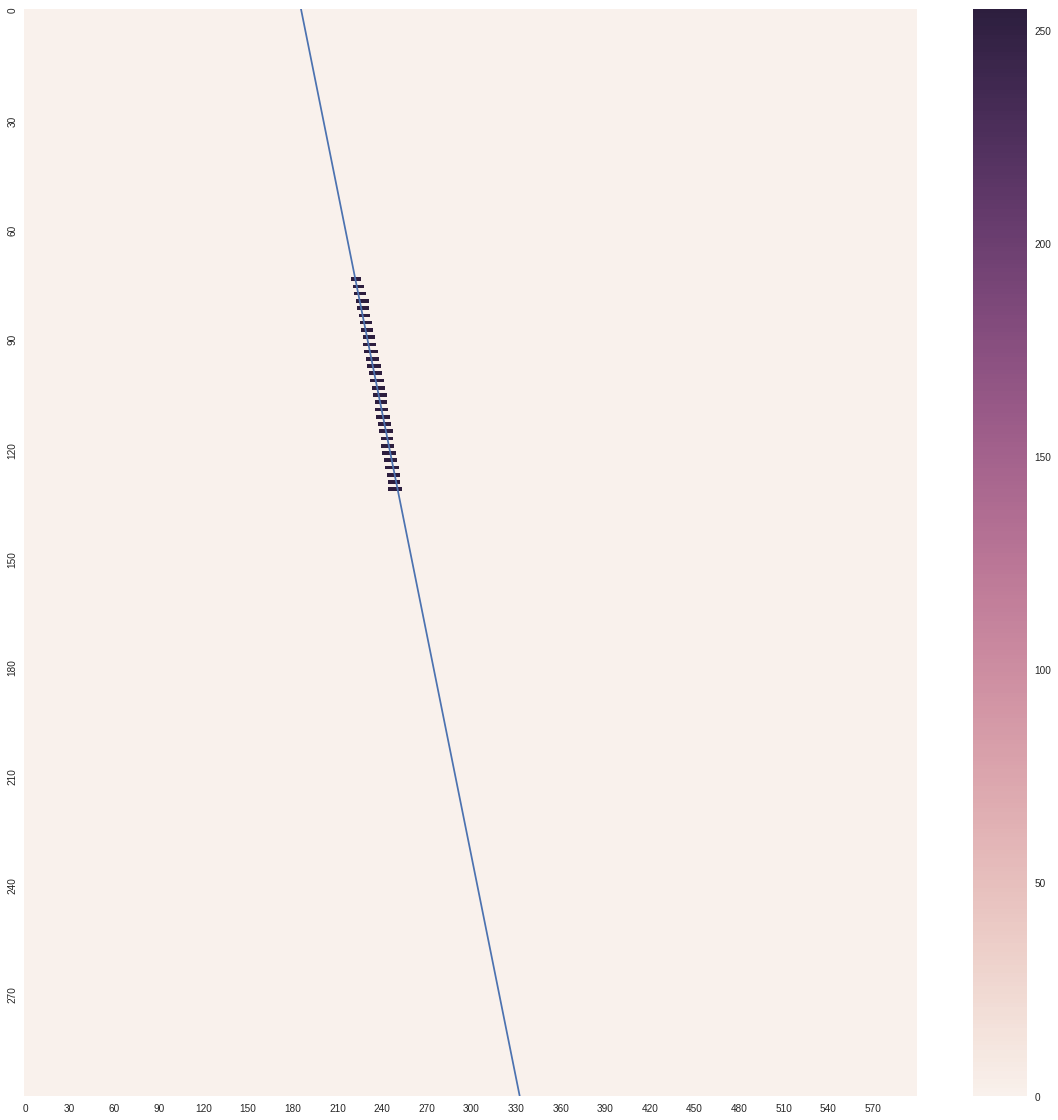

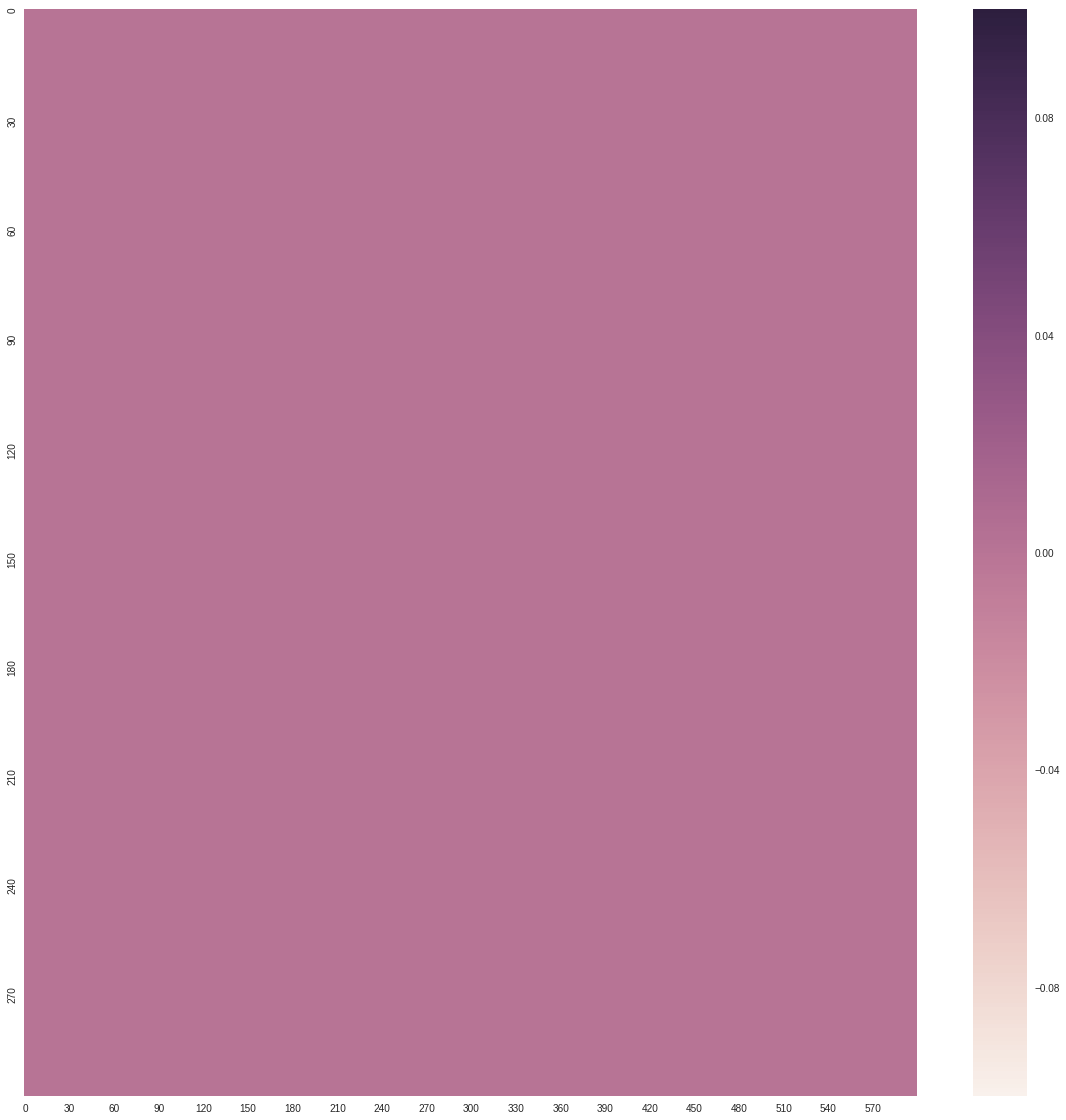

In [4]:
#sns.heatmap(images[1][::-1], xticklabels=30, yticklabels=30)
def AveDist(x,y,k,b):
    
    return np.sum(np.abs(k*x+b-y)/(k*k+1))/x.shape[0]

def r2(x,y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    return r_value*r_value

width = 20
thre = 80
fits = []
print xv,yv
for idx,image in enumerate(images):
    image = np.copy(image)
    image[int(yv)-width:int(yv)+width,:] = 0
    plt.figure(figsize=(20,20))
    sns.heatmap(image[::-1], xticklabels=30, yticklabels=30)
    if np.sum(image>10) > 60:
        ys,xs = np.where(image)

        try:
            k,b = np.polyfit(xs,ys,1)
            if r2(xs,ys)>0.8:
                fits.append((np.sum(image>10),k,b,r2(xs,ys)))
            else:
                fits.append((0,0,0,100))
            plt.plot(np.linspace(0,600,100),b+k*np.linspace(0,600,100))
            print r2(xs,ys)
        except:
            fits.append((0,0,0,100))
            
    else:
        fits.append((0,0,0,100))


0 2


(257.80769241453493, 153.36577737260254)

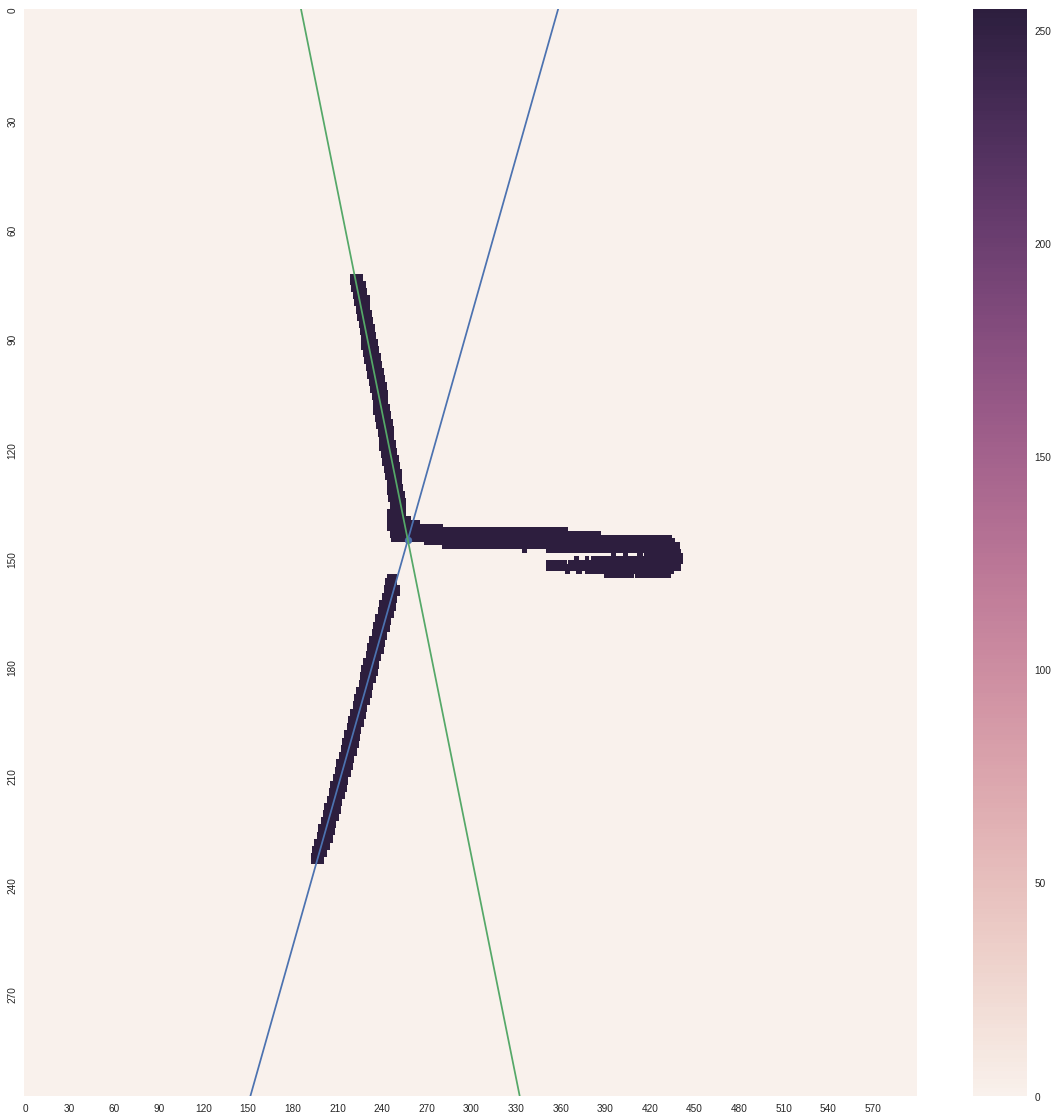

In [5]:

def DoIt(fits,pic,y0):
    pic = np.copy(pic)
    sns.heatmap(pic[::-1], xticklabels=30, yticklabels=30)
    
    if sum([f[0]>60 for f in fits]) == 0: raise Exception('I know Python!')
    
    max_idx = max(zip(range(4),fits),key=lambda x:x[1][0])[0]
    opp_idx = (max_idx+2)%4
    print max_idx, opp_idx

    k1,b1 = fits[max_idx][1:3]
    plt.plot(np.linspace(0,600,100),b1+k1*np.linspace(0,600,100))
    if fits[opp_idx][0]>50:
        k2,b2 = fits[opp_idx][1:3]
        plt.scatter([(b2-b1)/(k1-k2)], [(k2*b1-k1*b2)/(k2-k1)])
        plt.plot(np.linspace(0,600,100),b2+k2*np.linspace(0,600,100))
        return (b2-b1)/(k1-k2), (k2*b1-k1*b2)/(k2-k1)
    else:
        x0 = (y0-b1)/k1
        pic[:,:int(x0)+5]=0
        yy,xx = np.where(pic)
        
        
        k2,b2 = np.polyfit(xx,yy,1)
        if r2(xx,yy)>0.5: 
            plt.scatter([(b2-b1)/(k1-k2)], [(k2*b1-k1*b2)/(k2-k1)])
            plt.plot(np.linspace(0,600,100),b2+k2*np.linspace(0,600,100))
            return (b2-b1)/(k1-k2), (k2*b1-k1*b2)/(k2-k1)
        else:
            plt.scatter([x0],[y0])
            plt.plot(np.linspace(0,600,100),[y0]*100)
            return x0
            
        
DoIt(fits,pic,yv)
#plt.figure()
#sns.heatmap(pic[::-1], xticklabels=30, yticklabels=30)